mask unique values: [0. 1. 2.]
image shape: (512, 512, 120), mask shape: (512, 512, 120)


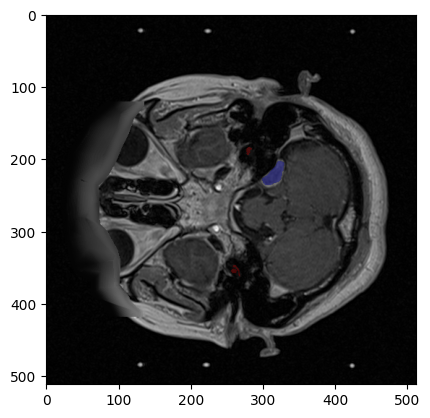

In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

image = nib.load("../data/training_source/crossmoda2021_ldn_1_ceT1.nii.gz")
image = image.get_fdata()
mask = nib.load("../data/training_source/crossmoda2021_ldn_1_Label.nii.gz")
mask = mask.get_fdata()
print(f"mask unique values: {np.unique(mask)}")
mask = np.ma.masked_where(mask == 0, mask)
print(f"image shape: {image.shape}, mask shape: {image.shape}") # heiht, width, depth
plt.imshow(image[:,:,32], cmap='gray')
plt.imshow(mask[:,:,32], cmap='jet', alpha=0.5)

In [2]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider, Checkbox

def nii_file_viewer(image: np.ndarray, mask: np.ndarray):
  def explore_nii_file(depth: int, show_mask: bool):
    plt.figure(figsize=(10, 10))
    plt.imshow(image[:,:,depth], cmap='gray')
    if show_mask:
      masked_mask = np.ma.masked_where(mask == 0, mask)
      plt.imshow(masked_mask[:,:,depth], cmap="jet", alpha=0.5)
    plt.show()

  slider = IntSlider(value=0, min=0, max=image.shape[2]-1, step=1, 
                     description='Depth', continuous_update=False)
  checkbox = Checkbox(value=False, description="Show mask")

  return interact(explore_nii_file, depth=slider, show_mask=checkbox)

nii_file_viewer(image, mask)

interactive(children=(IntSlider(value=0, continuous_update=False, description='Depth', max=119), Checkbox(valu…

<function __main__.nii_file_viewer.<locals>.explore_nii_file(depth: int, show_mask: bool)>